In [1]:
import pandas, seaborn
from glob import glob
import matplotlib as mpl

In [24]:
def get_data(glob_pattern):
    fnames = glob(glob_pattern)

    df = None
    for fname in fnames:
        id_query,endpoint = fname.split(".")[:2]
        id, query = id_query.split("-")
        timings_data = pandas.read_csv(fname, sep=',', header=None)
        timings_data.columns = ['Wall (s)', 'User (s)', 'Sys (s)']
        
        timings_data = timings_data.melt(var_name='clock', value_name='time (s)')
    
        timings_data['query'] = query.replace("_", " ")
        timings_data['endpoint'] = endpoint

        if df is None:
            df = timings_data
        else:
            df = pandas.concat([df, timings_data])
    return df

In [25]:
data = get_data("saved_runs/20241210T113800/??-*.timings.collected.csv")

In [26]:
data

,clock,time (s),query,endpoint
0,Wall (s),3.93,group by attribute avg,ontop
1,Wall (s),3.93,group by attribute avg,ontop
2,Wall (s),3.91,group by attribute avg,ontop
3,Wall (s),3.86,group by attribute avg,ontop
4,Wall (s),3.92,group by attribute avg,ontop
...,...,...,...,...
85,Sys (s),0.68,group by attribute sort,fuseki
86,Sys (s),0.34,group by attribute sort,fuseki
87,Sys (s),0.46,group by attribute sort,fuseki
88,Sys (s),0.48,group by attribute sort,fuseki


/scratch/grotec/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/scratch/grotec/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


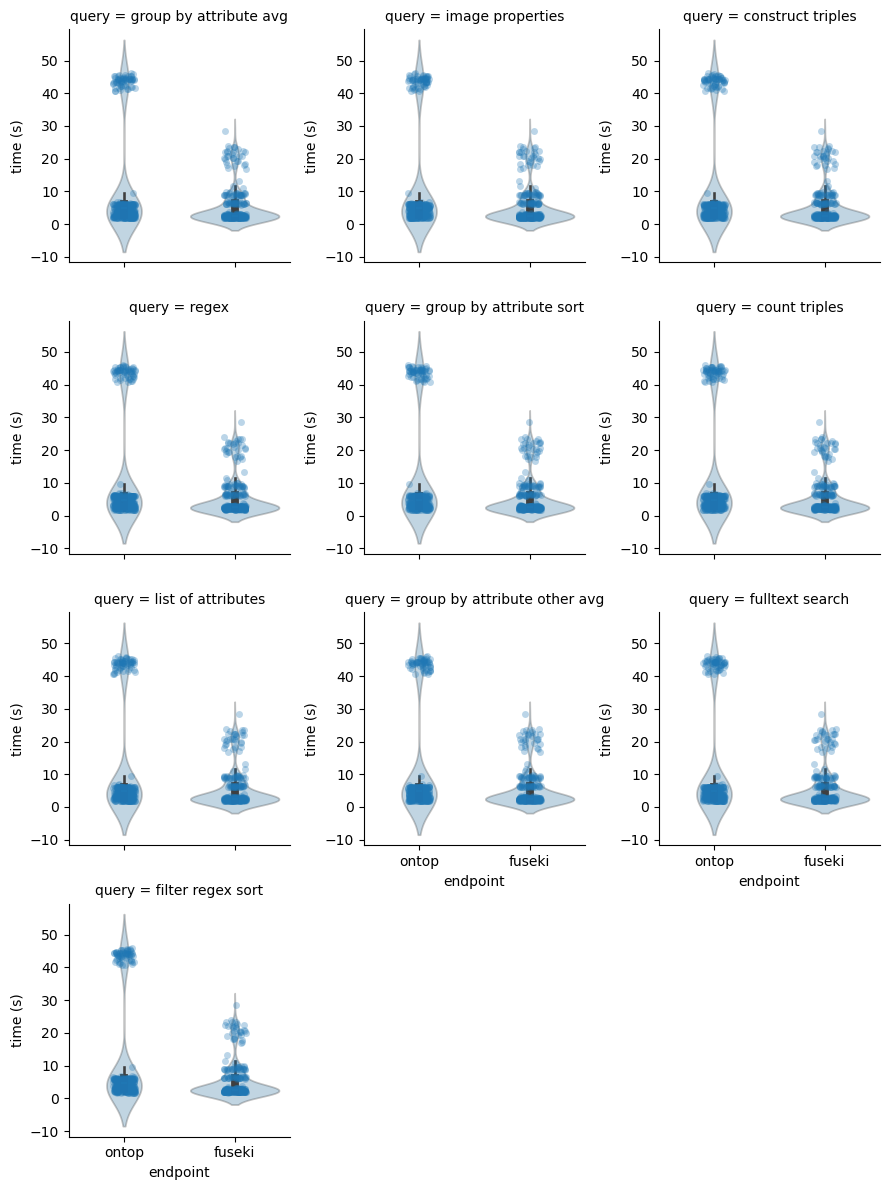

In [66]:
facet = seaborn.FacetGrid(data=data[data.clock=='Wall (s)'],
                          col='query',
                          col_wrap=3,
                          sharey=False
                         )
facet.map(seaborn.stripplot, data=data[data.clock=='Wall (s)'], x='endpoint', y='time (s)', alpha=.3, order=data.endpoint.unique())
facet.map(seaborn.violinplot, data=data[data.clock=='Wall (s)'], x='endpoint', y='time (s)', alpha=.3,  order=data.endpoint.unique())

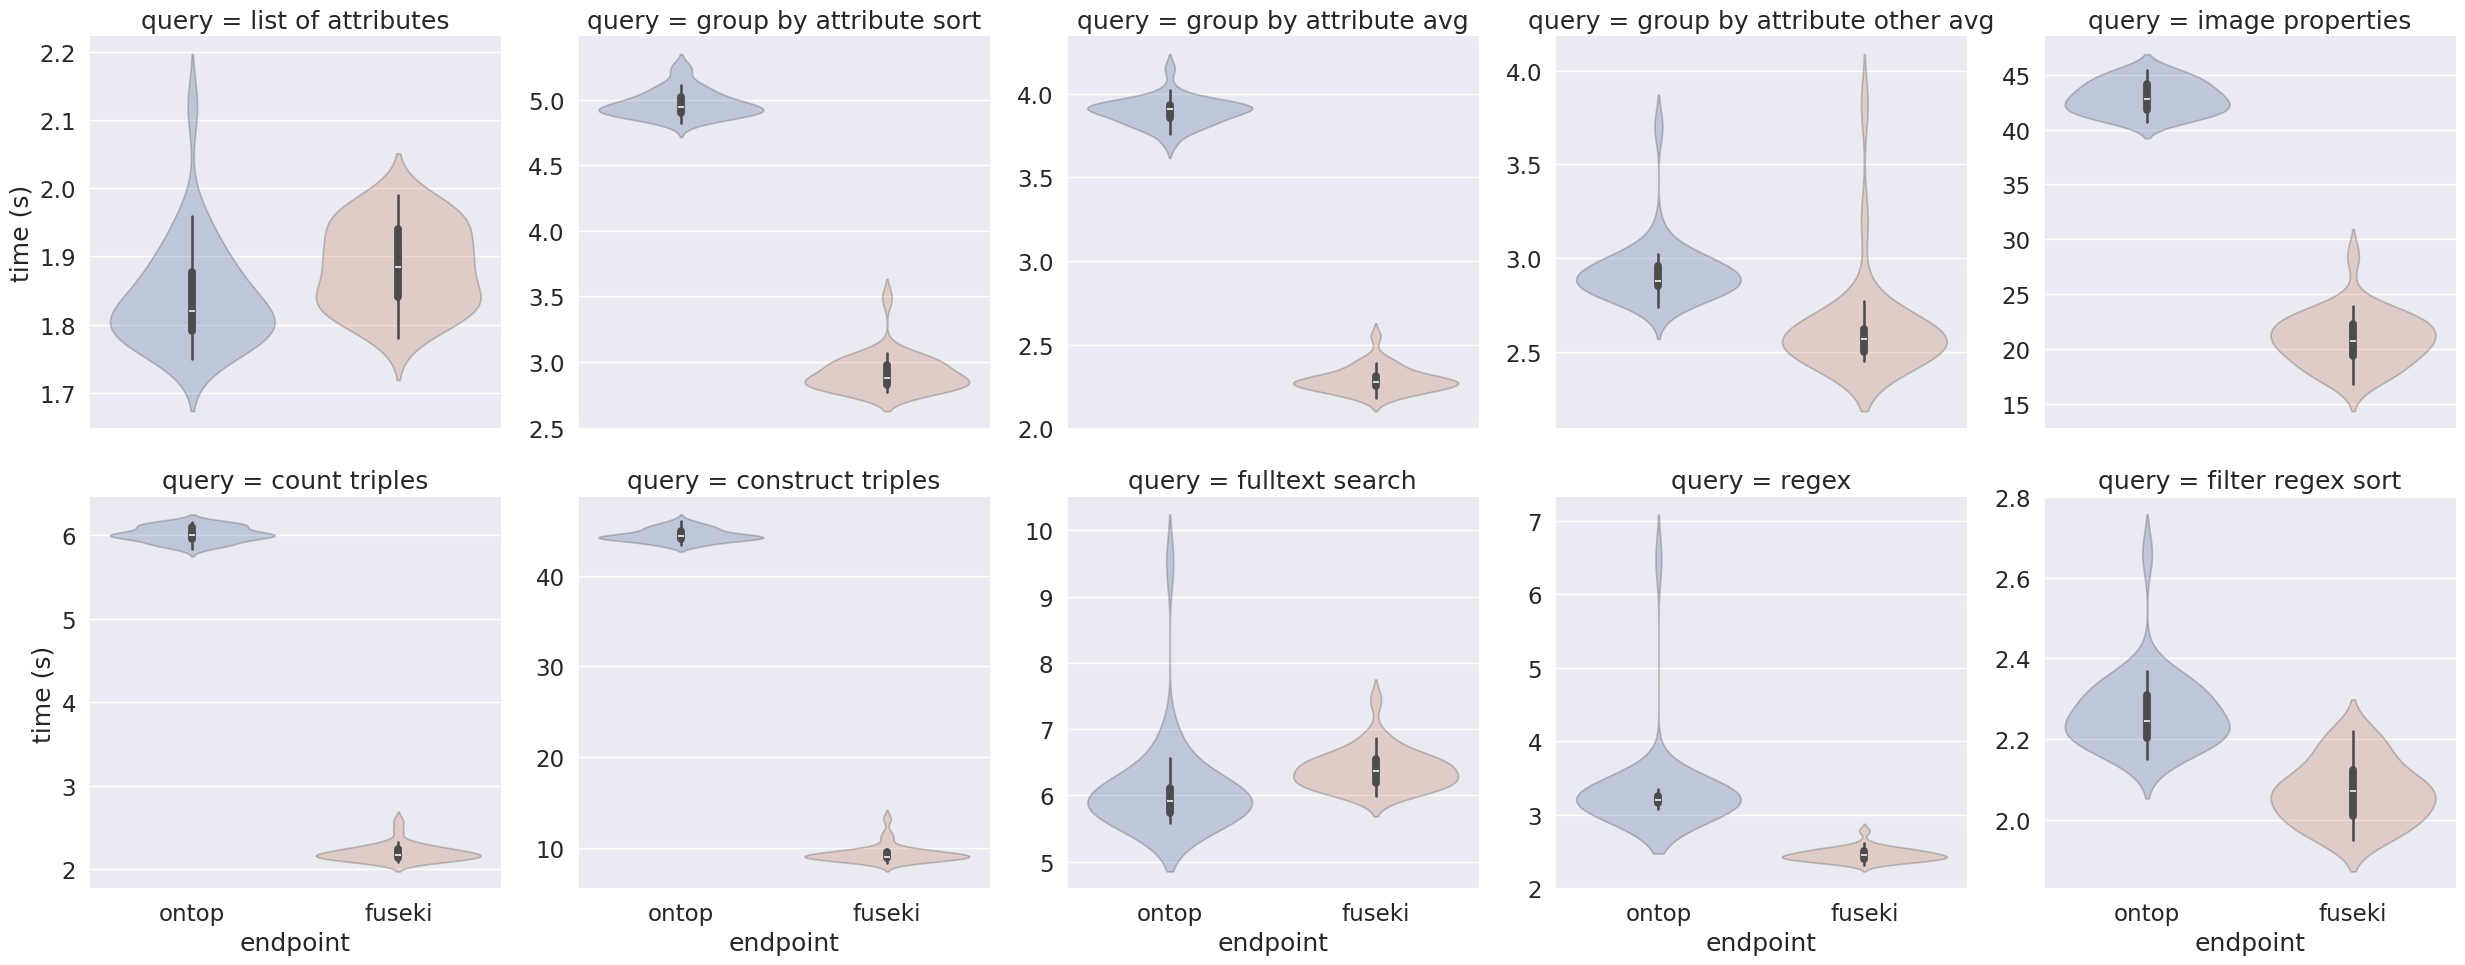

In [74]:
seaborn.set(font_scale=1.5)
seaborn.catplot(data=data[data.clock=='Wall (s)'],kind='violin', x='endpoint', y='time (s)', hue='endpoint', col='query', alpha=0.3, sharey=False, legend='auto', col_wrap=5,
                col_order=['list of attributes',
                           'group by attribute sort',
                           'group by attribute avg',
                           'group by attribute other avg',
                           'image properties',
                           'count triples',
                           'construct triples',
                           'fulltext search',
                           'regex',
                           'filter regex sort',
                          ] ) 
mpl.pyplot.savefig("saved_runs/20241210T113800/facet_walltime.png",
                  )

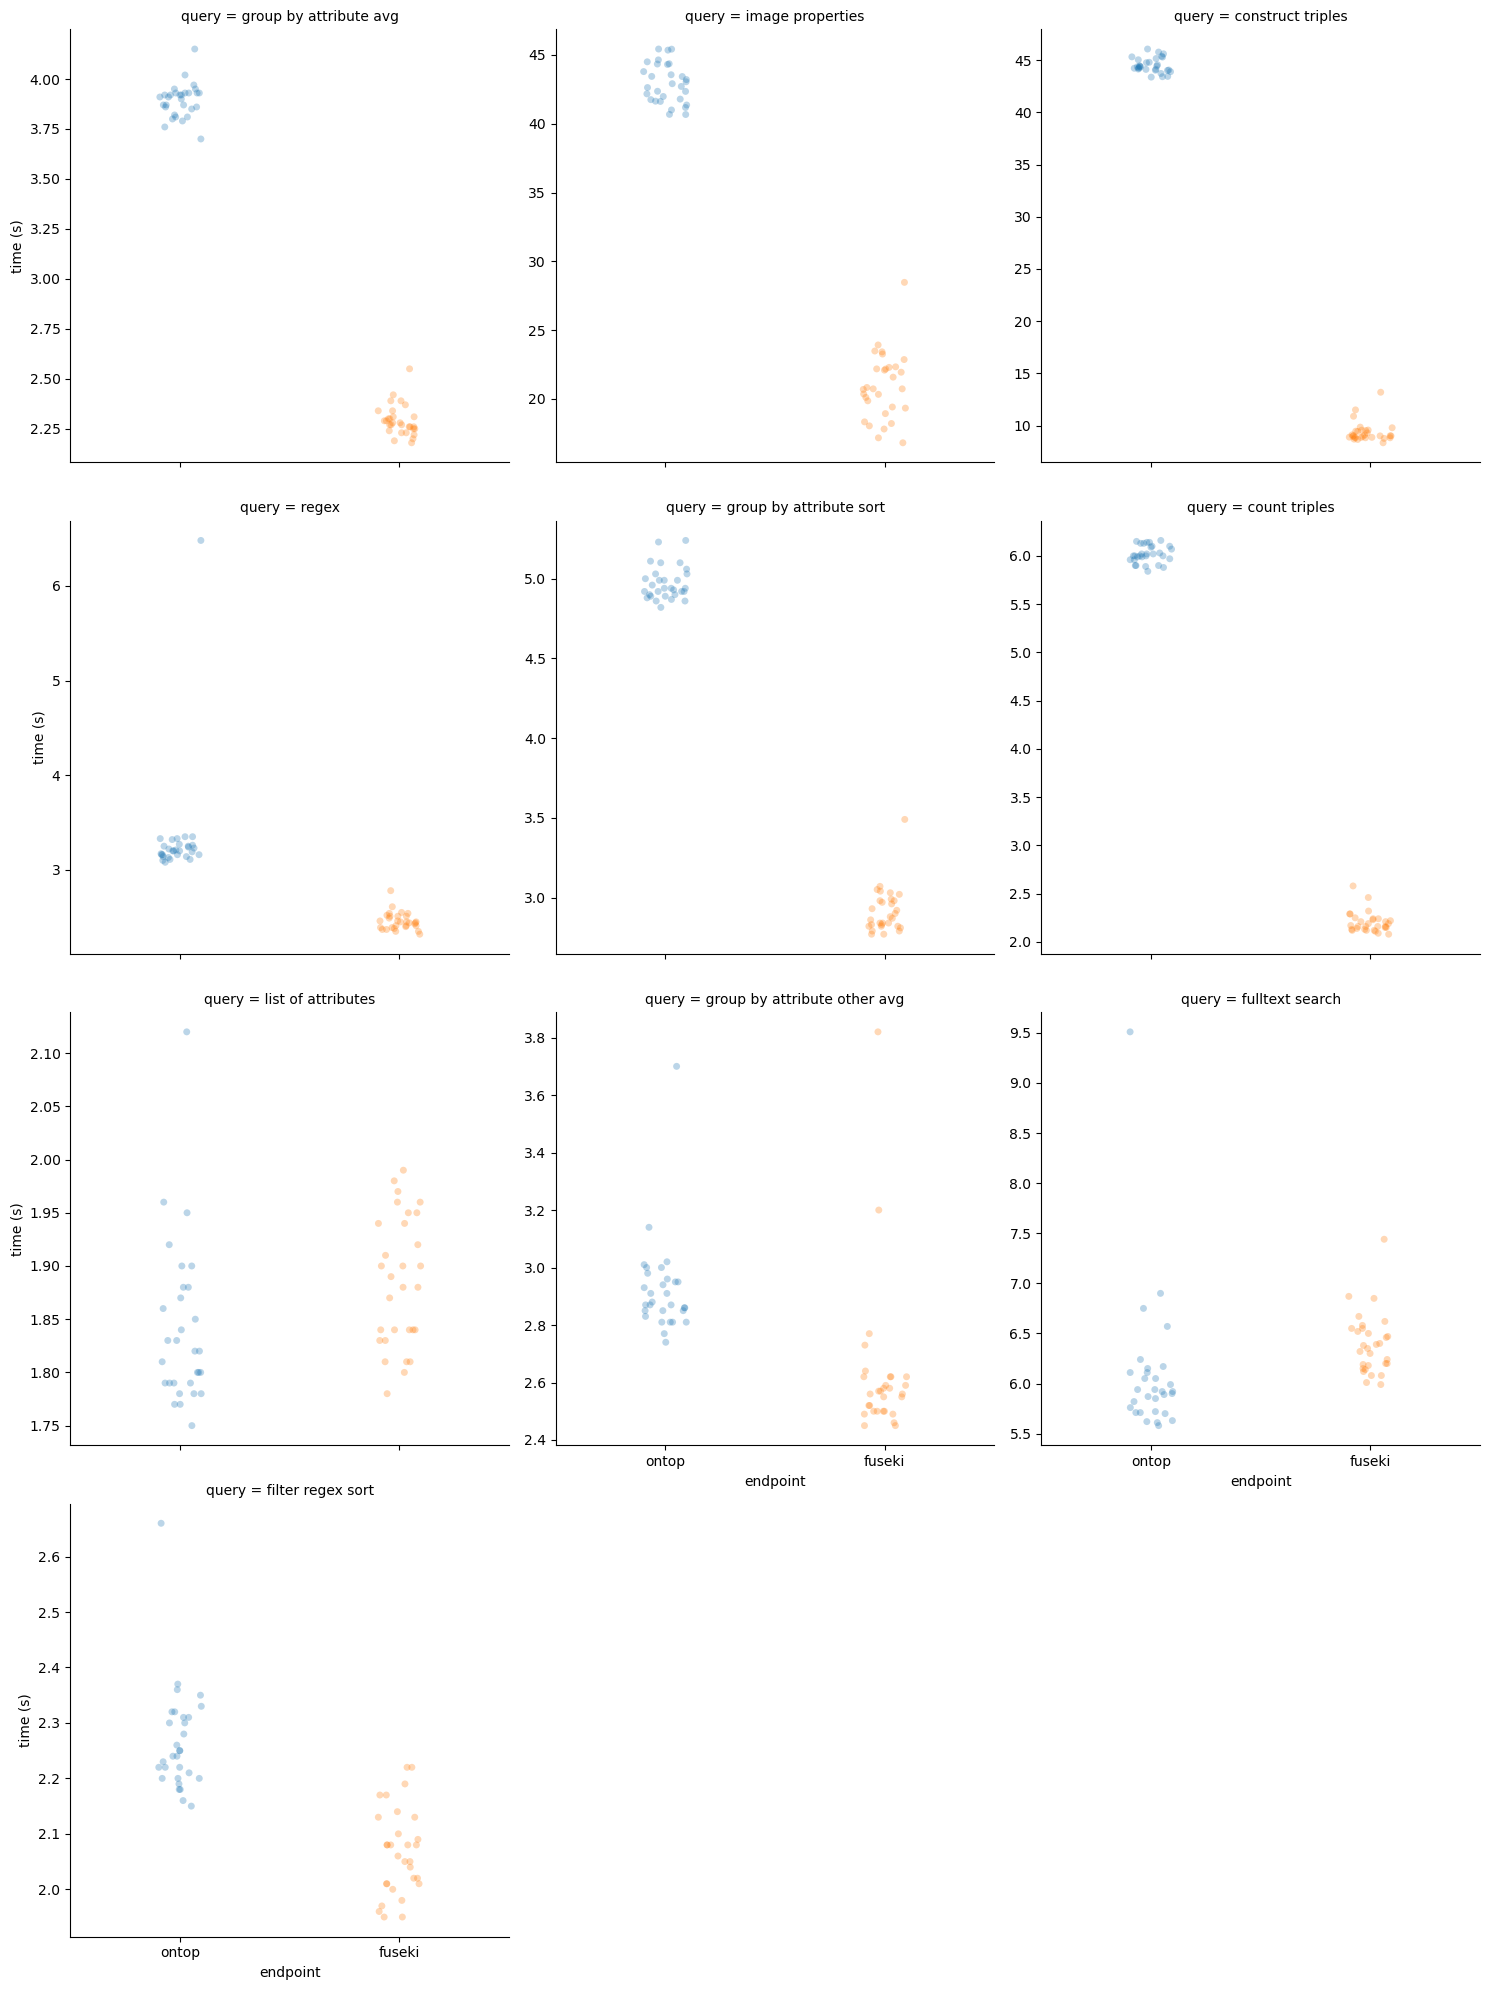

In [70]:
seaborn.catplot(kind='strip', data=data[data.clock=='Wall (s)'], x='endpoint', y='time (s)', hue='endpoint', col='query', alpha=0.3, sharey=False, legend='auto', col_wrap=3) 
mpl.pyplot.savefig("saved_runs/20241210T113800/facet_walltime.png")

Text(0.5, 0, 'rounds number')

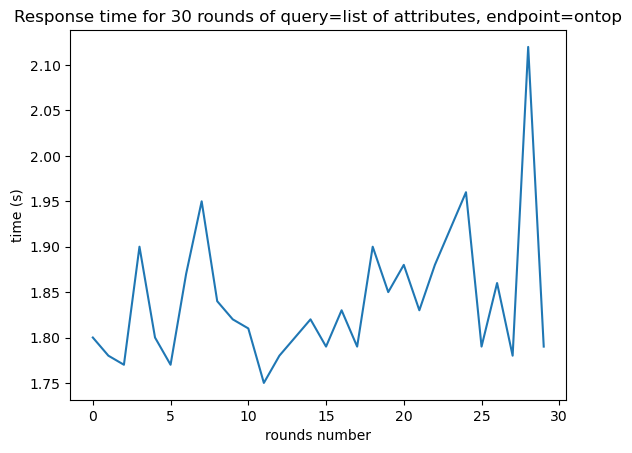

In [51]:
# Plot timings as function of run index
points = data[(data.clock=='Wall (s)') & (data['query']=='list of attributes') & (data.endpoint=='ontop')]
seaborn.lineplot(data=points, y='time (s)', x=points.index)
mpl.pyplot.title('Response time for 30 rounds of query=list of attributes, endpoint=ontop')
mpl.pyplot.xlabel('rounds number')


,clock,time (s),query,endpoint
0,Wall (s),1.80,list of attributes,ontop
1,Wall (s),1.78,list of attributes,ontop
2,Wall (s),1.77,list of attributes,ontop
3,Wall (s),1.90,list of attributes,ontop
4,Wall (s),1.80,list of attributes,ontop
5,Wall (s),1.77,list of attributes,ontop
6,Wall (s),1.87,list of attributes,ontop
7,Wall (s),1.95,list of attributes,ontop
8,Wall (s),1.84,list of attributes,ontop
9,Wall (s),1.82,list of attributes,ontop


In [38]:
data['query'].unique()

array(['group by attribute avg', 'image properties', 'construct triples',
       'regex', 'group by attribute sort', 'count triples',
       'list of attributes', 'group by attribute other avg',
       'fulltext search', 'filter regex sort'], dtype=object)